# Smucisca

## Projekt pri predmetu Programiranje 1

#### Zajeti podatki:

❄︎ datum in ura   
❄︎ ime smučišča  
❄︎ vreme  
❄︎ temperatura  
❄︎ količina snega (v cm)  
❄︎ odpiralni čas smučišča in zapiralni čas smučišča (v stolpcu obratovanje v obliki parov (odpiralni čas, zapiralni čas)   ter  v stolpcu odprto, ki pove koliko ur je bilo odprto smucisce)  
❄︎ delovanje gondol/sedežnic/vlečnic/parkov (v stolpcu sedeznice v obliki seznama in v stolpcu proge, ki pove koliko procentov vseh prog je bilo odprtih)

Podatki so bili zajeti na strani [snezni telefon](http://snezni-telefon.si) .

#### Predvidena analiza:

❄︎ kakšne so povezave temperature, količine snega, obratovalnim časom ter odprtostjo prog na posameznih smučiščih?  
❄︎ v katerem obdobju je bilo na Slovenskih smučiščih največ snega?  
❄︎ koliko je količina snega odvisna od temperature in vremena?  
❄︎ koliko je od količine snega/ temperature/ vremena odvisen obratovalni čas smučišča?  
❄︎ katero smučišče ima največji povprečen obratovalni čas?  

### Analiza podatkov slovenskih smučišč je razdeljena na tri večje skope:

❄︎ analiza podatov po posameznih smučiščih  
❄︎ primerjava med smučišči  
❄︎ ostale primerjave (odvisnost količine snega od temperature, vremena, koliko sta temperatura in vreme povezana)

In [201]:
%matplotlib inline

import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') #naredi lepše grafe
plt.rcParams['figure.figsize'] = (15, 5)

Pripravi skupno datoteko:

In [202]:
Skupna=pd.read_csv('projekt-programiranje1/csv_datoteke/skupna.csv', parse_dates=['cas'],index_col='cas')

Pripravi datoteke po posameznih smuciscih:

In [247]:
Bukovnik = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Bukovnik.csv',parse_dates=['cas'],index_col='cas')
CeljskaKoča = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/CeljskaKoča.csv',parse_dates=['cas'],index_col='cas')
GTCKope = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/GTCKope.csv',parse_dates=['cas'],index_col='cas')
Javornik = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Javornik.csv',parse_dates=['cas'],index_col='cas')
MacesnovcRateče = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/MacesnovcRateče.csv',parse_dates=['cas'],index_col='cas')
MariborskoPohorje = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/MariborskoPohorje.csv',parse_dates=['cas'],index_col='cas')
Poseka = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Poseka.csv',parse_dates=['cas'],index_col='cas')
RibnicanaPohorju = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RibnicanaPohorju.csv',parse_dates=['cas'],index_col='cas')
Ribniškakoča = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Ribniškakoča.csv',parse_dates=['cas'],index_col='cas')
RibniškoPohorje = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RibniškoPohorje.csv',parse_dates=['cas'],index_col='cas')
Rogla = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Rogla.csv',parse_dates=['cas'],index_col='cas')
RTCGolte = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RTCGolte.csv',parse_dates=['cas'],index_col='cas')
RTCKranjskaGora = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RTCKranjskaGora.csv',parse_dates=['cas'],index_col='cas')
RTCKrvavec = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RTCKrvavec.csv',parse_dates=['cas'],index_col='cas')
SCCerkno = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/SCCerkno.csv',parse_dates=['cas'],index_col='cas')
ŠCRudno = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/ŠCRudno.csv',parse_dates=['cas'],index_col='cas')
Šentjošt = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Šentjošt.csv',parse_dates=['cas'],index_col='cas')
SKIBorČrnivrh = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/SKIBorČrnivrh.csv',parse_dates=['cas'],index_col='cas')
Soriškaplanina = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Soriškaplanina.csv',parse_dates=['cas'],index_col='cas')
STCStarivrh = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/STCStarivrh.csv',parse_dates=['cas'],index_col='cas')
StražaBled = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/StražaBled.csv',parse_dates=['cas'],index_col='cas')
TrijeKralji = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/TrijeKralji.csv',parse_dates=['cas'],index_col='cas')
ŽičniceVogel = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/ŽičniceVogel.csv',parse_dates=['cas'],index_col='cas')

# 1. Analiza po posameznih smučiščih

## 1.1. Bukovnik

In [204]:
Bukovnik.head()

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-01-24 15:00:00,Bukovnik,2016-01-24,sončno,-10,50,"{('13.00', '20.00'), ('16.00', '20.00')}",11,{'vlečnica': '1/1'},100
2016-01-25 21:00:00,Bukovnik,2016-01-25,oblačno,-2,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100
2016-01-26 09:00:00,Bukovnik,2016-01-26,sončno,-3,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100
2016-01-26 15:00:00,Bukovnik,2016-01-26,sončno,-3,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100
2016-01-27 09:00:00,Bukovnik,2016-01-27,sončno,-3,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100


Primer ene ure:

In [205]:
Bukovnik.iloc[0]

smucisce                                       Bukovnik
datum                                        2016-01-24
vreme                                            sončno
temperatura                                         -10
sneg                                                 50
obratovanje    {('13.00', '20.00'), ('16.00', '20.00')}
odprto                                               11
sedeznice                           {'vlečnica': '1/1'}
proge                                               100
Name: 2016-01-24 15:00:00, dtype: object

### 1.1.1. povprečne vrednosti po dnevih

In [206]:
Bukovnik.groupby('datum').mean().head()

,temperatura,sneg,odprto,proge
datum,,,,
2016-01-24,-10,50,11,100
2016-01-25,-2,50,4,100
2016-01-26,-3,50,4,100
2016-01-27,-3,50,4,100
2016-01-28,-2,50,4,100


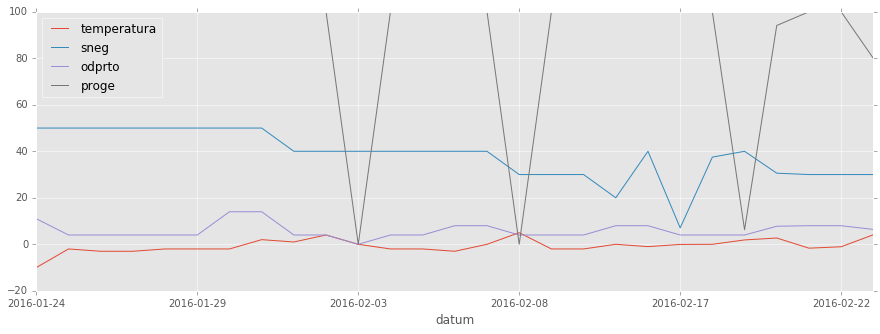

In [207]:
Bukovnik.groupby('datum').mean().plot()

### 1.1.2. tempretatura

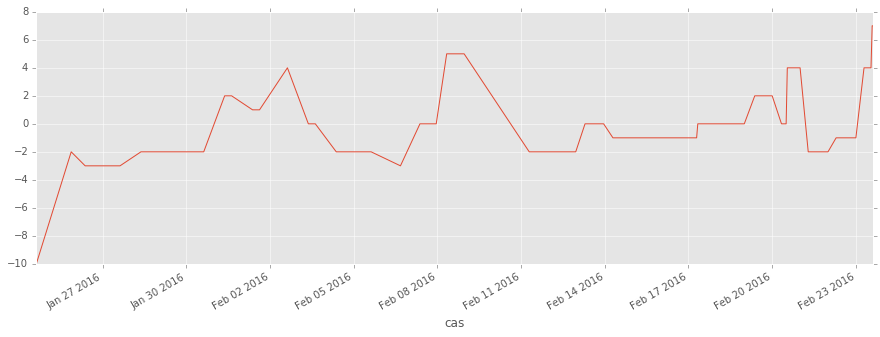

In [208]:
Bukovnik['temperatura'].plot()

### 1.1.3. količina snega (v cm)

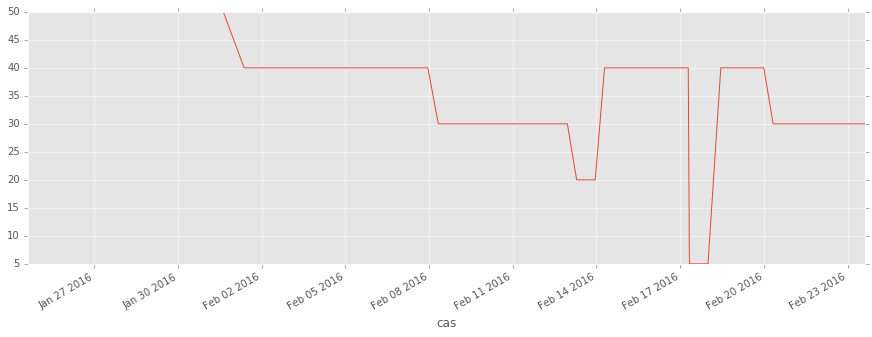

In [209]:
Bukovnik['sneg'].plot()

maksimalna količina snega v opazovalnem obdobju:

In [210]:
Bukovnik['sneg'].max()

50

### 1.1.4. obratovalni čas smučišča v urah 

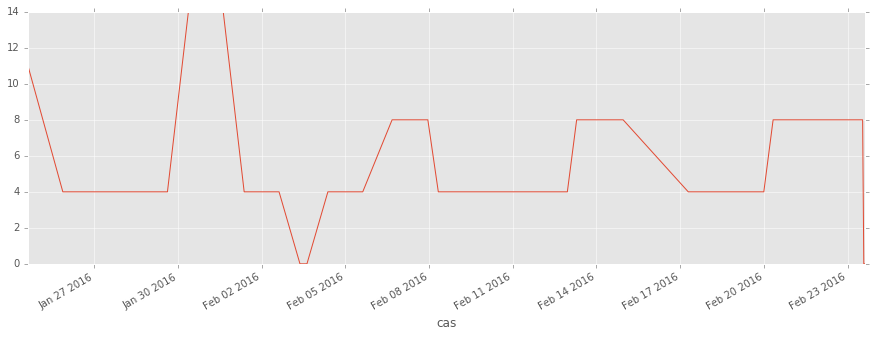

In [211]:
Bukovnik['odprto'].plot()

### 1.1.5. število odprtih prog (v procentih)

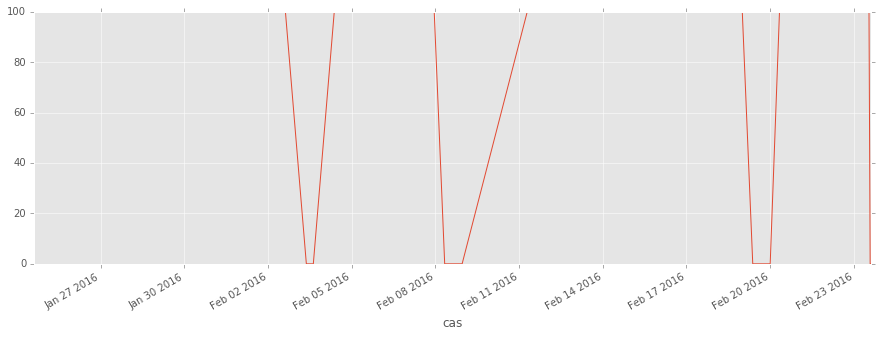

In [212]:
Bukovnik['proge'].plot()

### 1.1.6.  Primerjava

In [213]:
Bukovnik[['temperatura', 'sneg', 'odprto', 'proge']].head(10)

,temperatura,sneg,odprto,proge
cas,,,,
2016-01-24 15:00:00,-10,50,11,100
2016-01-25 21:00:00,-2,50,4,100
2016-01-26 09:00:00,-3,50,4,100
2016-01-26 15:00:00,-3,50,4,100
2016-01-27 09:00:00,-3,50,4,100
2016-01-27 12:00:00,-3,50,4,100
2016-01-27 15:00:00,-3,50,4,100
2016-01-28 09:00:00,-2,50,4,100
2016-01-28 12:00:00,-2,50,4,100


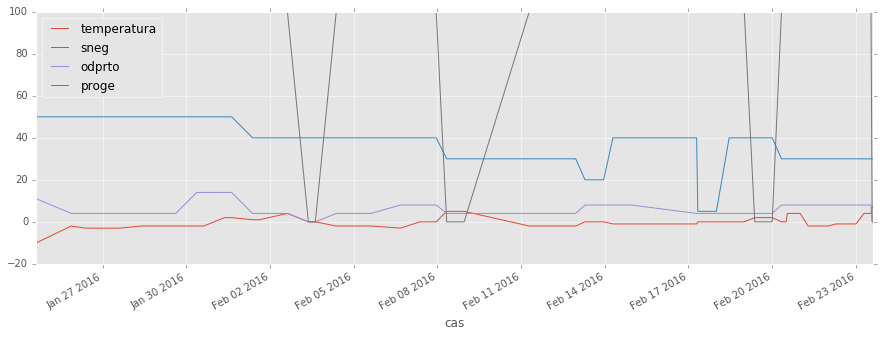

In [214]:
Bukovnik[['temperatura', 'sneg', 'odprto', 'proge']].plot()

Iz tega primera je težko sklepati na kakršnokoli povezavo med temperaturo, količino snega, obratovalnim časom ter odprtostjo prog. Poskusimo še z Mariborskim Pohorjem.

## 1.2. Mariborsko Pohorje 

In [215]:
MariborskoPohorje.head(9)

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-01-24 15:00:00,MariborskoPohorje,2016-01-24,pretežno jasno,-2,45,"{('18.00', '21.00'), ('9.00', '16.00')}",10,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-25 21:00:00,MariborskoPohorje,2016-01-25,pretežno jasno,2,45,"{('9.00', '16.00')}",7,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-26 09:00:00,MariborskoPohorje,2016-01-26,pretežno jasno,5,45,"{('9.00', '16.00')}",7,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-26 15:00:00,MariborskoPohorje,2016-01-26,pretežno jasno,5,45,"{('9.00', '16.00')}",7,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-27 09:00:00,MariborskoPohorje,2016-01-27,pretežno jasno,6,45,"{('9.00', '16.00')}",7,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-27 12:00:00,MariborskoPohorje,2016-01-27,pretežno jasno,6,45,"{('9.00', '16.00')}",7,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-27 15:00:00,MariborskoPohorje,2016-01-27,pretežno jasno,6,45,"{('9.00', '16.00')}",7,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-28 09:00:00,MariborskoPohorje,2016-01-28,sončno,7,45,"{('18.00', '21.00'), ('9.00', '16.00')}",10,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33
2016-01-28 12:00:00,MariborskoPohorje,2016-01-28,sončno,7,45,"{('18.00', '21.00'), ('9.00', '16.00')}",10,"{'gondola': '1/1', 'sedeznica': '3/5', 'vlečni...",53.33


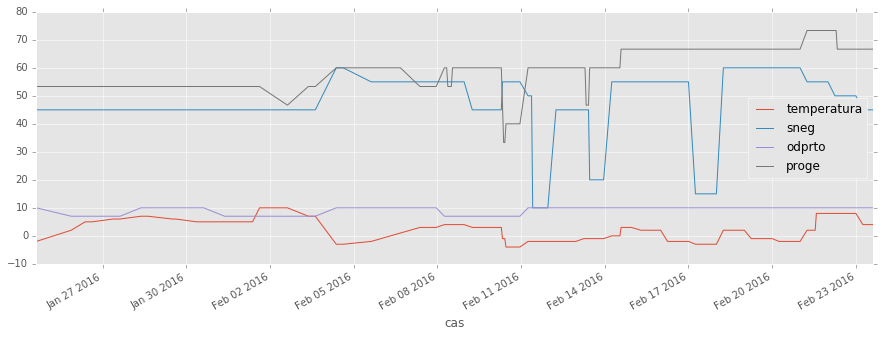

In [219]:
MariborskoPohorje[['temperatura','sneg','odprto','proge']].plot()

primer ene ure:

In [143]:
MariborskoPohorje.iloc[9]

smucisce                                       MariborskoPohorje
datum                                                 2016-01-28
vreme                                                     sončno
temperatura                                                    7
sneg                                                          45
obratovanje              {('18.00', '21.00'), ('9.00', '16.00')}
odprto                                                        10
sedeznice      {'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...
proge                                                      53.33
Name: 2016-01-28 15:00:00, dtype: object

### 1.2.1. povprečne vrednosti po dnevih

In [144]:
MariborskoPohorje.groupby('datum').mean().head()

,temperatura,sneg,odprto,proge
datum,,,,
2016-01-24,-2,45,10,53.33
2016-01-25,2,45,7,53.33
2016-01-26,5,45,7,53.33
2016-01-27,6,45,7,53.33
2016-01-28,7,45,10,53.33


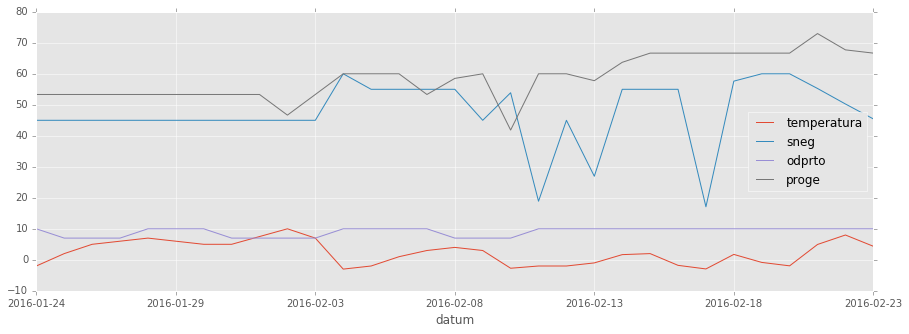

In [145]:
MariborskoPohorje.groupby('datum').mean().plot()

### 1.2.2. tempretatura

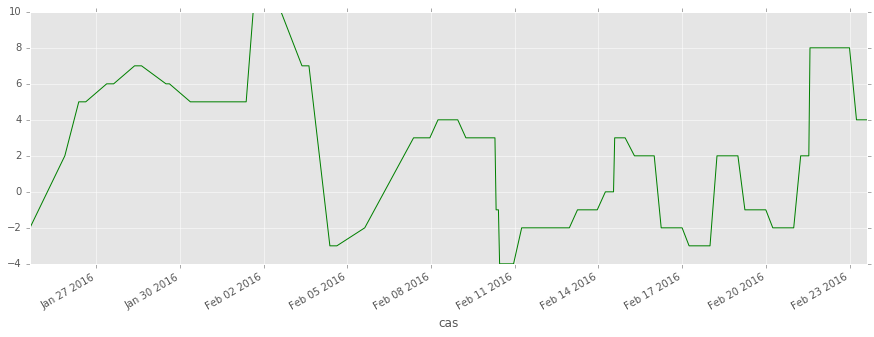

In [221]:
MariborskoPohorje['temperatura'].plot(color='green')

Minimalna in maksimalna temperatura v opazovalnem obdobju:

In [166]:
MariborskoPohorje['temperatura'].min()

-4

In [167]:
MariborskoPohorje['temperatura'].max()

10

### 1.2.3. količina snega (v cm)

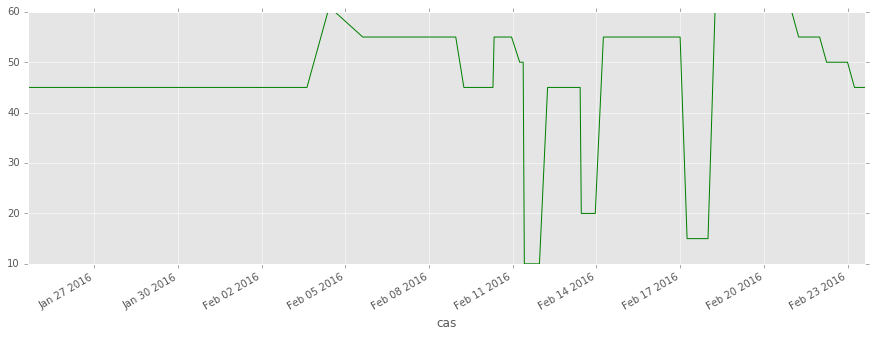

In [222]:
MariborskoPohorje['sneg'].plot(color='green')

In [168]:
MariborskoPohorje['sneg'].min()

10

In [170]:
MariborskoPohorje['sneg'].max()

60

### 1.2.4. obratovalni čas smučišča v urah 

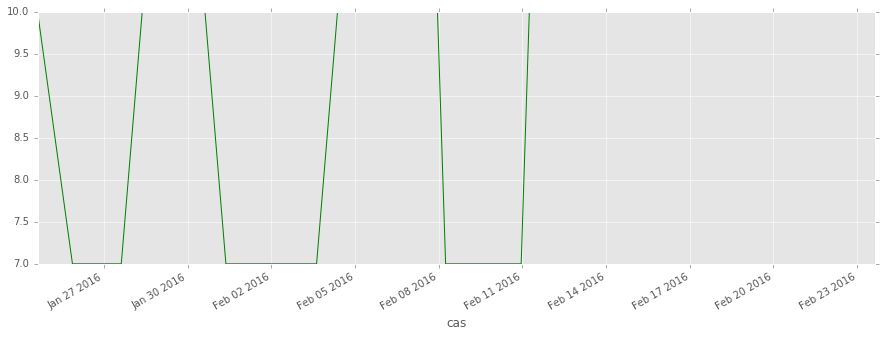

In [223]:
MariborskoPohorje['odprto'].plot(color='green')

In [171]:
MariborskoPohorje['odprto'].min()

7.0

In [172]:
MariborskoPohorje['odprto'].max()

10.0

### 1.2.5. število odprtih prog (v procentih)

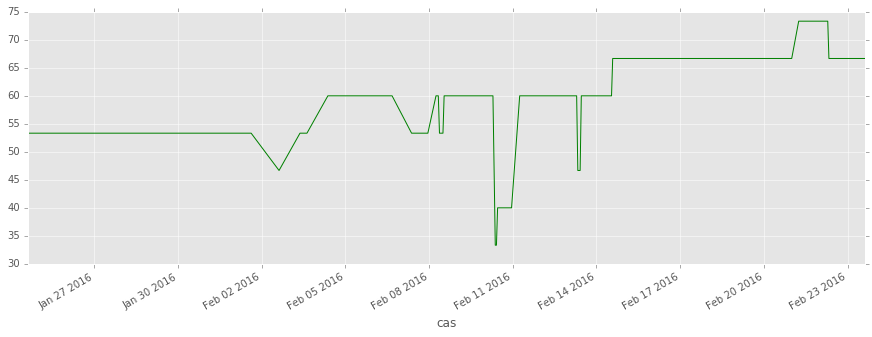

In [224]:
MariborskoPohorje['proge'].plot(color='green')

In [173]:
MariborskoPohorje['proge'].min()

33.329999999999998

In [174]:
MariborskoPohorje['proge'].max()

73.329999999999998

# 2. Primerjava med smučišči 

V ta namen smo pripravili datoteko Skupna.csv

In [152]:
Skupna

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-01-24 15:00:00,RTCKrvavec,2016-01-24,sončno,-2,50,"{('8.00', '16.00')}",8.0,"{'sedeznica': '7/7', 'vlečnica': '3/5', 'gondo...",84.62
2016-01-24 15:00:00,MariborskoPohorje,2016-01-24,pretežno jasno,-2,45,"{('18.00', '21.00'), ('9.00', '16.00')}",10.0,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-01-24 15:00:00,Rogla,2016-01-24,sončno,-3,60,"{('9.00', '16.00'), ('17.00', '21.00')}",11.0,"{'sedeznica': '2/2', 'vlečnica': '7/10'}",75.00
2016-01-24 15:00:00,RTCKranjskaGora,2016-01-24,sončno,-4,45,"{('19.00', '22.00'), ('9.00', '16.00')}",10.0,"{'sedeznica': '4/5', 'vlečnica': '8/13'}",66.67
2016-01-24 15:00:00,SCCerkno,2016-01-24,pretežno jasno,1,60,"{('9.00', '16.00')}",7.0,"{'sedeznica': '4/5', 'vlečnica': '2/2'}",85.71
2016-01-24 15:00:00,ŽičniceVogel,2016-01-24,pretežno jasno,3,40,"{('9.00', '16.00')}",7.0,"{'sedeznica': '2/4', 'vlečnica': '3/4', 'gondo...",66.67
2016-01-24 15:00:00,Soriškaplanina,2016-01-24,delno jasno,-2,35,"{('9.00', '16.00')}",7.0,{'vlečnica': '2/4'},50.00
2016-01-24 15:00:00,GTCKope,2016-01-24,sončno,-3,40,"{('9.00', '16.00')}",7.0,"{'sedeznica': '2/2', 'vlečnica': '6/6'}",100.00
2016-01-24 15:00:00,RTCGolte,2016-01-24,sončno,1,45,"{('9.00', '16.00')}",7.0,"{'sedeznica': '2/3', 'vlečnica': '2/3', 'gondo...",71.43


## 2.1. Povprečne vrednosti

Povprečne vrednosti temperature, količine snega, obratovalnega časa (odprto), procenta odprtih prog (proge)

In [153]:
Skupna.groupby('smucisce').mean()

,temperatura,sneg,odprto,proge
smucisce,,,,
Bukovnik,0.077253,31.952790,6.021459,84.549356
Celjskakoča,2.274194,27.677419,6.912903,47.528806
GTCKope,0.370031,50.259939,9.180428,82.632691
Javornik,-0.478022,18.763736,5.631868,34.615385
MacesnovcRateče,0.234568,27.654321,7.703704,74.488148
MariborskoPohorje,1.197531,47.515432,9.370370,62.038025
Poseka,0.804054,29.513514,1.864865,22.297297
RTCGolte,0.070988,67.373457,7.000000,89.195833
RTCKranjskaGora,1.159875,47.664577,9.764890,69.056113


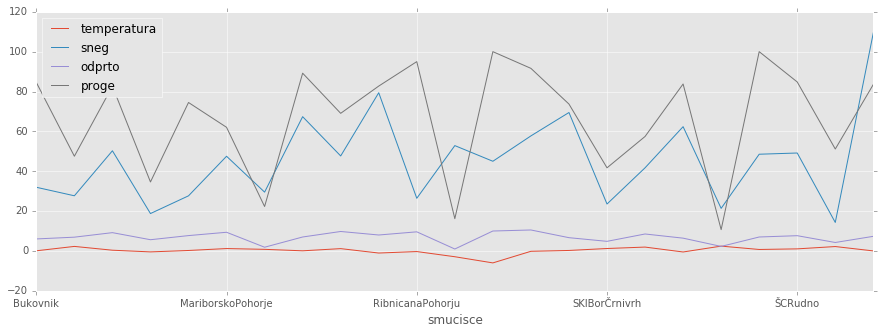

In [154]:
Skupna.groupby('smucisce').mean().plot()

In [261]:
Primerjava=pd.merge(MariborskoPohorje,Rogla, on='datum')

In [274]:
Primerjava

## 2.2. Minimalne in Maksimalne vrednosti
### Koliko in kje
### 2.2.1. Temperatura

Kje je bila dosežena najnižje temperatura v tem obdobju? Koliko je bilo pri tej temperaturi sneg in kakšno je bilo vreme?  

In [194]:
Skupna['temperatura'].min()

-10

In [195]:
Skupna['temperatura'].max()

14

### 2.2.2. Količina snega

In [193]:
Skupna[['sneg','temperatura','smucisce','vreme']].min()

sneg                     0
temperatura            -10
smucisce          Bukovnik
vreme          delno jasno
dtype: object

In [191]:
Skupna[['sneg','temperatura','smucisce','vreme']].max()

sneg                                            235
temperatura                                      14
smucisce                               ŽičniceVogel
vreme          visoka oblačnost, zg. sneg - sp. dež
dtype: object

# 3. Ostale analize